# Question

Company A is interested in building geofences around its retail locations and using 3rd party mobile data to dress a better profile of their consumers, helping plan future marketing campaigns.
Before manually mapping geofences of thousands of retail locations, the leadership team turns towards you, the data scientist, to create/find at least 1000 geofences in QC to test the 3rd party data.
<ol>
    <li> Provide a list of at least 1000 retail locations and their geofences in QC </li>
    <li> Display them on a map </li>
    <li>  Discuss pros/cons of your approach </li>
    <li>  Plot the distribution of their sales </li>
    <li> Discuss the distribution of their sales (normality, outliers, variance, standard deviation, etc.) </li>
</ol>
To achieve this, you can use the technologies and tools of your choice.

What are geofences:
<a href = "https://en.wikipedia.org/wiki/Geofence#:~:text=A%20geofence%20is%20a%20virtual,school%20zones%20or%20neighborhood%20boundaries">Geofence Wikipedia</a> <br>
Other resources:
<href> https://www.statcan.gc.ca/eng/lode/databases/odb </href>

<h1><center>Solution</center></h1>

In [2]:
#importation of libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import geopy as gpy
from geopy.extra import rate_limiter 
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import folium
import shapely
import gmaps
import folium.plugins as plugings

In [3]:
retail_df = pd.read_csv("retail_locations.csv")
retail_df.head()

,erp_id,province_code,lat,long,sales
0,4,QC,45.537593,-73.597075,0.089069
1,19,QC,45.488636,-73.568175,0.074907
2,22,QC,48.387871,-68.470686,0.611644
3,24,QC,46.795660,-71.356166,-0.778827
4,37,QC,45.510311,-73.570841,0.586588


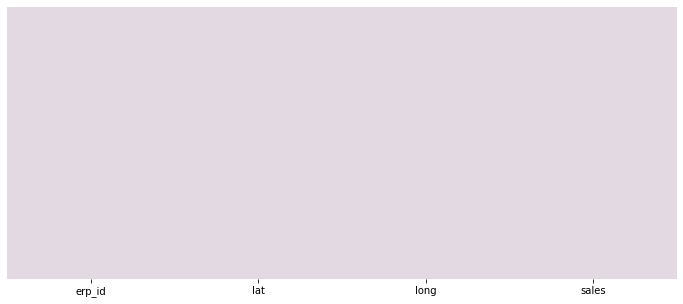

In [4]:
#Checking for missing values
plt.figure(figsize=(12, 5))
sns.heatmap(retail_df.corr().isnull(), cmap ="twilight_r", yticklabels=False, cbar = False, )

No missing values

In [5]:
#concatenating the lat and long to have a cordinate point
retail_df["geom"] = retail_df["lat"].map(str) + "," + retail_df["long"].map(str)
retail_df["geom"].head(3)

0      45.537593,-73.597075
1      45.488636,-73.568175
2    48.3878711,-68.4706861
Name: geom, dtype: object

In [6]:
# part 1
geolocator = gpy.geocoders.Nominatim(user_agent="ajayiebenezer70@gmail.com", timeout=10)
location = rate_limiter.RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [7]:
def location_point(cordinate):
    address = ",".join(geolocator.reverse(cordinate)[0].split(",")[:6]).strip()
    postal_code =  (geolocator.reverse(cordinate))[0].split(", ")[-2].strip()
    return address, postal_code

In [8]:
retail_df["full_address"] = retail_df["geom"].apply(location_point)
retail_df["address"] = retail_df["full_address"].apply(lambda addr:addr[0])
retail_df["postal_code"] = retail_df["full_address"].apply(lambda addr:addr[1])

In [9]:
retail_df.drop("full_address", axis=1, inplace=True)
retail_df.head(1000)

,erp_id,province_code,lat,long,sales,geom,address,postal_code
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9
1,19,QC,45.488636,-73.568175,0.074907,"45.488636,-73.568175","1738, Rue Notre-Dame Ouest, Petite-Bourgogne, ...",H3J 1M3
2,22,QC,48.387871,-68.470686,0.611644,"48.3878711,-68.4706861","14, , Rimouski, Rimouski-Neigette, Bas-Saint-L...",G5N 5P1
3,24,QC,46.795660,-71.356166,-0.778827,"46.7956598,-71.3561663","1438, Rue Notre-Dame, L'Ancienne-Lorette, Québ...",G2E 1Z7
4,37,QC,45.510311,-73.570841,0.586588,"45.510310700000005,-73.570841","169, Place Sainte-Famille, Milton Parc, Platea...",H2X 1X7
...,...,...,...,...,...,...,...,...
995,5745,QC,45.524107,-73.551472,-1.827916,"45.5241071,-73.55147209999998","1955, Rue Sainte-Catherine Est, Village gai, S...",H2K 2H5
996,5749,QC,45.467655,-73.620779,-0.806901,"45.467655,-73.620779","2527, Avenue Hingston, Upper Lachine, Côte-des...",H4A 1H4
997,5752,QC,46.765250,-71.487290,-0.298703,"46.76525,-71.48729","Le Magasin Fossambault, 991, Route de Fossamba...",G3A 1W8
998,5766,QC,46.951123,-71.207579,0.108185,"46.9511229,-71.20757929999999","3, Rue des Hautes-Terres, Laurentides, Beaupor...",G1B 0C5


In [10]:
# part 1b and 2

In [11]:
gdf = gpd.GeoDataFrame(retail_df, geometry=gpd.points_from_xy(retail_df.long, retail_df.lat))
gdf.head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9,POINT (-73.59708 45.53759)
1,19,QC,45.488636,-73.568175,0.074907,"45.488636,-73.568175","1738, Rue Notre-Dame Ouest, Petite-Bourgogne, ...",H3J 1M3,POINT (-73.56817 45.48864)
2,22,QC,48.387871,-68.470686,0.611644,"48.3878711,-68.4706861","14, , Rimouski, Rimouski-Neigette, Bas-Saint-L...",G5N 5P1,POINT (-68.47069 48.38787)
3,24,QC,46.795660,-71.356166,-0.778827,"46.7956598,-71.3561663","1438, Rue Notre-Dame, L'Ancienne-Lorette, Québ...",G2E 1Z7,POINT (-71.35617 46.79566)
4,37,QC,45.510311,-73.570841,0.586588,"45.510310700000005,-73.570841","169, Place Sainte-Famille, Milton Parc, Platea...",H2X 1X7,POINT (-73.57084 45.51031)


In [38]:
px.set_mapbox_access_token("pk.eyJ1IjoiZWJlbmFqYXkyIiwiYSI6ImNrcGc0OWh4NjBmcTQyb3F4d29sdnMybDkifQ.mZ1ZiDepeliJ21myb3N-wA")
px.scatter_mapbox(gdf, lat="lat", lon="long",size_max=6, zoom=8, width=1000, height=600)

In [42]:
folium_map = folium.Map(location=[45.534699,-73.569848],
                        zoom_start=12,
                        tiles='cartodbpositron')


plugings.FastMarkerCluster(data=list(zip(retail_df['lat'].values, retail_df['long'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

There are clusters of locations around Montreal (637), Quebec city (274), Longueuil (120), Repentigny (43), Shawinigan (32), Rouyn-Noranda (22), Rimouski (18) and Sherbrooke (6)in that order.

In [14]:
# value count for each geographical location
gdf["_"] = gdf["postal_code"].apply(lambda x: x[:2])
gdf["_"].value_counts()

H2    297
G1    192
H3    163
H4    115
J4     98
H1     61
G2     54
G9     32
G3     23
J3     22
J6     21
J5     20
G5     18
J9     17
J1      6
Qu      5
G0      4
H5      3
J0      1
Name: _, dtype: int64

In [15]:
gdf.head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9,POINT (-73.59708 45.53759),H2
1,19,QC,45.488636,-73.568175,0.074907,"45.488636,-73.568175","1738, Rue Notre-Dame Ouest, Petite-Bourgogne, ...",H3J 1M3,POINT (-73.56817 45.48864),H3
2,22,QC,48.387871,-68.470686,0.611644,"48.3878711,-68.4706861","14, , Rimouski, Rimouski-Neigette, Bas-Saint-L...",G5N 5P1,POINT (-68.47069 48.38787),G5
3,24,QC,46.795660,-71.356166,-0.778827,"46.7956598,-71.3561663","1438, Rue Notre-Dame, L'Ancienne-Lorette, Québ...",G2E 1Z7,POINT (-71.35617 46.79566),G2
4,37,QC,45.510311,-73.570841,0.586588,"45.510310700000005,-73.570841","169, Place Sainte-Famille, Milton Parc, Platea...",H2X 1X7,POINT (-73.57084 45.51031),H2


In [106]:
# type(polygon['geometry'][0]) creating a polygon of points around the postal code first 2 digit
gdf_clusters = gdf[['erp_id','postal_code','lat', 'long', 'geometry', '_']]
clusters = gdf_clusters['_'].unique()[:-4]
poly_map = dict()

for c in clusters:
    points = gdf[gdf['_'] == c]['geometry']
    poly = shapely.geometry.Polygon([[p.x, p.y] for p in points])
    poly_map[c] = poly
    
gdf_clusters = gdf_clusters.replace({'_':poly_map}).drop("geometry", axis = 1)
gdf_clusters.columns = ['erp_id','postal_code','lat', 'long', 'geometry']

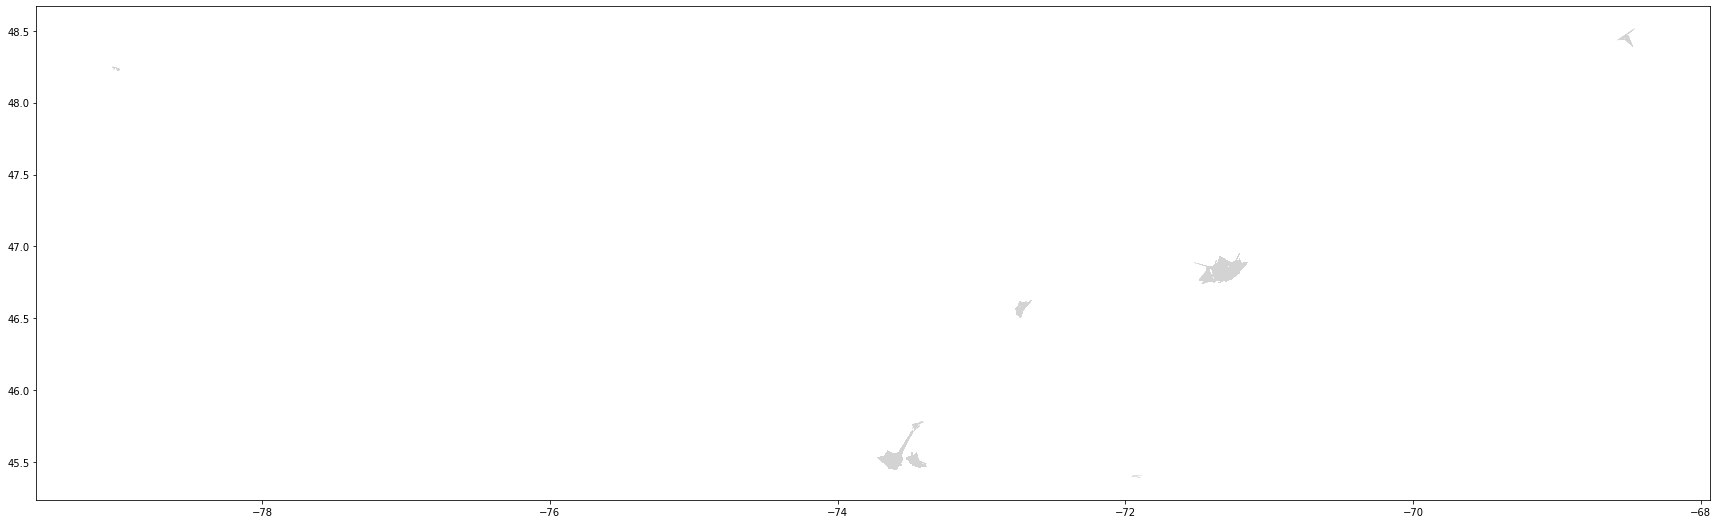

<Figure size 2160x7200 with 0 Axes>

In [146]:

fig, ax = plt.subplots(figsize=(30,70))
fig = plt.figure(figsize=(30,100))
gdf_clusters.plot(ax=ax,color="lightgray")
# gdf.plot(ax=ax, color="black")
plt.tight_layout()
# plt.axis("off")
plt.show()

These are exaxtly the points a map with some little boundary extension. However, due to the aspect ratio of plot and smaller cluster regions, the pattern is almost not clear. If the clusters are around the whole of Quebec for example, the pattern will have been much clearer 

However, if we are interested in covering a larger region, say, each city where we have the retail locations, i.e, Montreal, Quebec city, Longueuil, Repentigny, etc,(we could be interested in tracking a foreign customer who occasionally visit one of these regions). In such situation, we could try to cover a larger geological area rather than a very small region. There are available geoJSON files , mostly on government website that has the exact points for these regions. 

In [18]:
polygon = gpd.read_file("quebec.geojson.txt")

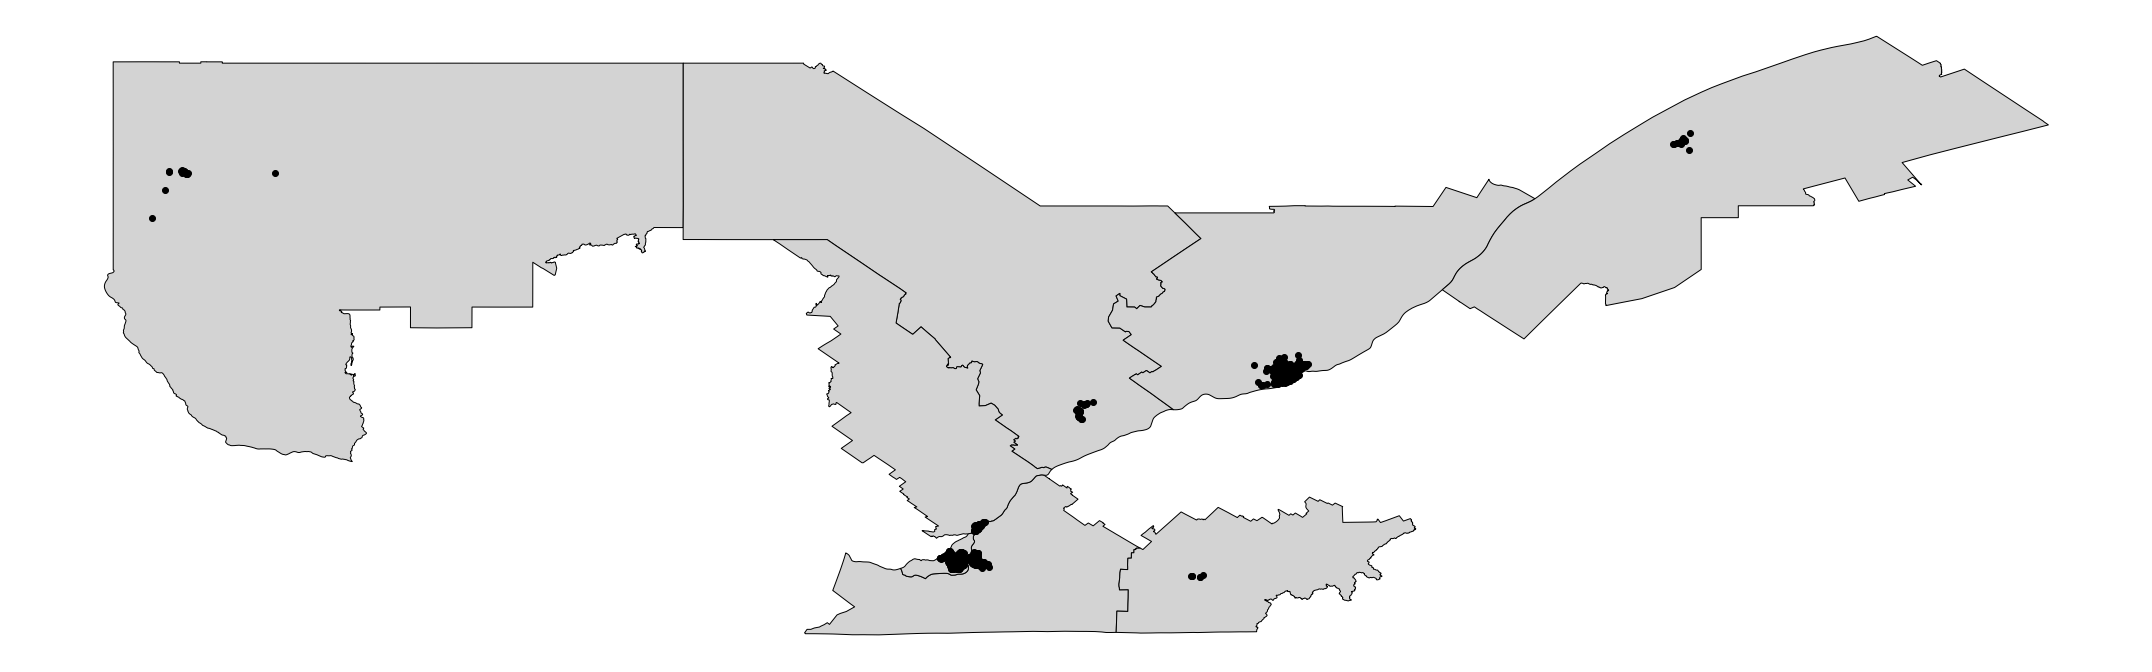

In [40]:
fig, ax = plt.subplots(figsize=(30,40))
polygon.loc[[2,3, 4, 6, 7, 10, 13, 15]].plot(ax=ax,color="lightgrey", edgecolor = 'black')
gdf.plot(ax=ax, color="black")
plt.axis("off")
plt.tight_layout()


part 3
Pros

Readily available packages to be use. 
Easy implementation
compuational time taske long

Cons
Domain knowledge might be required
some library maps are not compatible with github

Text(2, 0.4, 'mean')

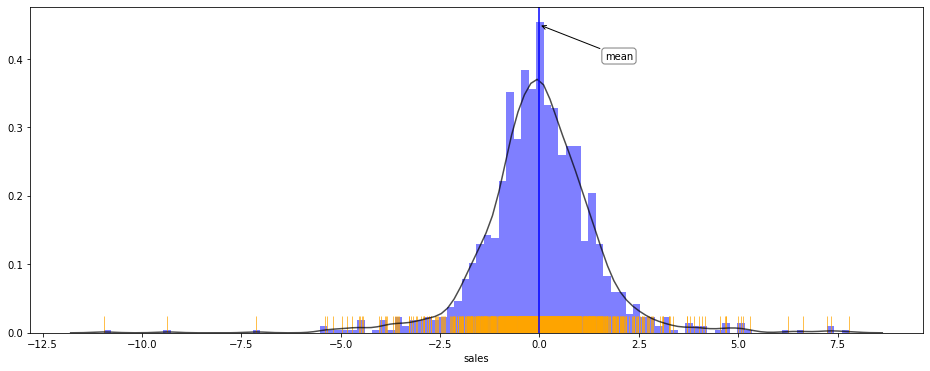

In [20]:
#part 4 & 5
plt.figure(figsize=(16, 6))
sns.distplot(retail_df["sales"], bins = 100, hist_kws={"histtype": "bar", "linewidth":  0.8 ,"alpha": 0.5, "color": "blue"},
                 kde_kws={"color":"black", "alpha" : 0.7}, 
                 rug=True, rug_kws={"color":"orange", "alpha": 0.7})
plt.axvline(x=retail_df.sales.mean(), color = "blue") #mean line
plt.annotate('mean', xy=(retail_df.sales.mean(), 0.45), xytext=(2, 0.4), ha='center', xycoords='data',
            arrowprops=dict(arrowstyle="->"), bbox=dict(boxstyle="round", fc="none", ec="gray"))

The distribution of sales looks like a Gaussian distribution which implies that it is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. Hence, the mean (the blue line) is approximately equal to the median (mean = <b>-0.006920</b>} and median = <b>-0.017408</b>) <br>

However, we may want to inteprete the curve to be slightly negatively skewed in the sense that imore values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer (<b>583</b> are to the right and <b>569</b> are to the left). We could see 

Considering the Central Limit Theorem, the more independent random variables we have, the more the curve normalizes to being perfectly normally distributed. 

In [21]:
# The result above explained(1st paragraph)
retail_df[["sales"]].describe(include="all")

,sales
count,1152.000000
mean,-0.006920
std,1.487999
min,-10.957124
25%,-0.715086
50%,-0.017408
75%,0.738120
max,7.788058


In [22]:
# The result above explained(2nd paragraph)
print(f"{sum(retail_df['sales'] < (retail_df.sales.mean()))} sales are below the mean sales point")
print(f"{sum(retail_df['sales'] > (retail_df.sales.mean()))} sales are above the mean sales point ")

581 sales are below the mean sales point
571 sales are above the mean sales point 


C:\Users\Bamidele Ajayi\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



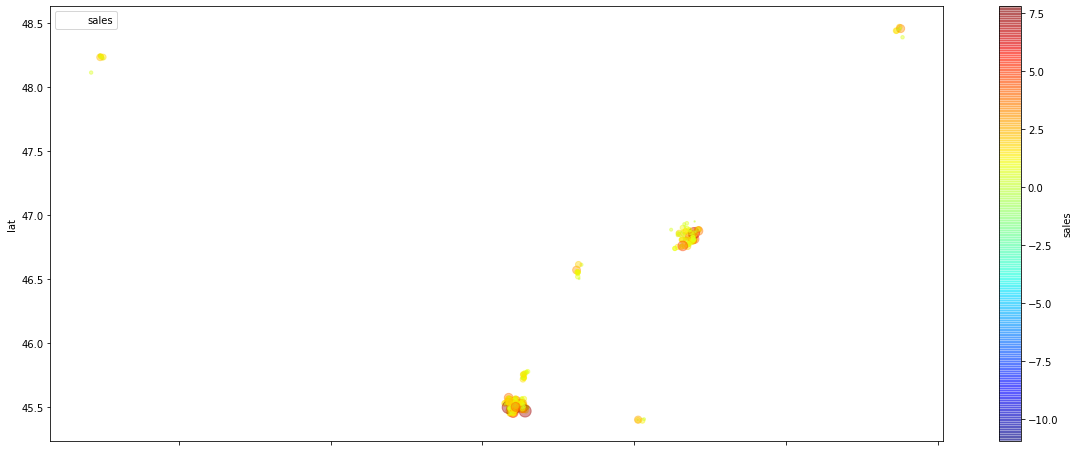

In [23]:
retail_df.plot(kind = "scatter", x = "long", y = "lat", figsize = (20, 8), alpha=0.4, 
               s=retail_df["sales"]*20, label="sales", c="sales", cmap=plt.get_cmap("jet"), colorbar=True)

In [24]:
retail_df[["sales"]].describe(include="all")

,sales
count,1152.000000
mean,-0.006920
std,1.487999
min,-10.957124
25%,-0.715086
50%,-0.017408
75%,0.738120
max,7.788058


In [25]:
retail_df[["sales"]].describe(include="all").iloc[4]["sales"]

-0.71508576525

In [26]:
sum(retail_df["sales"] < 0)

583

In [27]:
retail_df.sales.var()

2.2141412226368273

Variance measures how spread out the data is from the average sales. A variance of zero indicates that all of the data values are identical. All non-zero variances are positive.
A small variance indicates that the data points tend to be very close to the mean, and to each other. A high variance indicates that the data points are very spread out from the mean, and from one another. Variance is the average of the squared distances from each point to the mean

In [28]:
retail_df.sales.std()

1.487999066745953

Standard deviation (represented by the symbol sigma, σ) shows how much variation or dispersion exists from the average (mean), or expected value. More precisely, it is a measure of the average distance between the values of the data in the set and the mean. A low standard deviation indicates that the data points tend to be very close to the mean; a high standard deviation indicates that the data points are spread out over a large range of values. A useful property of standard deviation is that, unlike variance, it is expressed in the same units as the data.
Standard error increases when standard deviation, i.e. the variance of the population, increases. Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean.

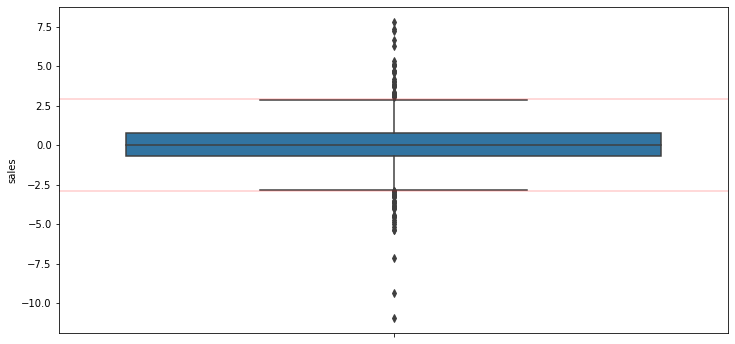

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(y= retail_df.sales)
plt.axhline(-2.895, color = "red", alpha = 0.2) 
plt.axhline(2.918, color = "red", alpha = 0.2)

Outlier is a value that lies in a data series on its extremes, which is either very small or large and thus can affect the overall observation made from the data series. 

When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

Statistically, these are points that lie above the 1.5 times the interquartile range above the third quartile () or below the first quartile, i.e the lower limit and upper limit respectively.

  <center>Lower Limit = $Q_1$ - $1.5IQR$</center>
  <center>Upper Limit = $Q_3$ + $1.5IQR$</center>

These values which lies on either of the extremes red line can be considered outliers and should be discarded from the entire series so that any analysis made on this series is not influenced by these extreme values. So the data series that should be considered for further observation or study after discarding the outliers are as below. However, since a lot of values are still clustered around the min of the whisker, we could consider the isolated points as the outlier. 

In [30]:
q1 = retail_df[["sales"]].describe().iloc[4]["sales"]
q3 = retail_df[["sales"]].describe().iloc[6]["sales"]
iqr = q3 - q1

print(f"Lower Limit: {q1 - 1.5*iqr}")
print(f"Upper Limit: {q3 + 1.5*iqr}")

Lower Limit: -2.89489491525
Upper Limit: 2.91792948475


In [31]:
retail_df[retail_df["sales"] < (q1 - 1.5*iqr)].head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
6,54,QC,46.835607,-71.218640,-3.877404,"46.835607,-71.21863990000001","1788, Rue de la Trinité, Maizerets, La Cité-Li...",G1J 2M4,POINT (-71.21864 46.83561),G1
8,69,QC,45.518215,-73.578109,-3.181758,"45.518215399999995,-73.5781092","130, Avenue Duluth Est, Saint-Louis, Plateau M...",H2W 2E5,POINT (-73.57811 45.51822),H2
25,159,QC,45.459887,-73.624582,-3.084699,"45.459886700000006,-73.6245821","Provigo, 6600, Rue Saint-Jacques, Upper Lachin...",H4B 1V8,POINT (-73.62458 45.45989),H4
36,244,QC,45.486071,-73.464938,-4.541264,"45.4860706,-73.4649375","IGA, Rue Mance, Greenfield Park, Longueuil, Lo...",J4P 3G2,POINT (-73.46494 45.48607),J4
40,252,QC,45.505026,-73.571004,-5.340211,"45.5050263,-73.5710036","La Tour Union, 2010, Rue Aylmer, Quartier des ...",H3A 2S9,POINT (-73.57100 45.50503),H3


In [32]:
retail_df[retail_df["sales"] > (q3 + 1.5*iqr)].head()

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
32,220,QC,45.576084,-73.655587,3.788434,"45.576084200000004,-73.65558670000001","2289, Boulevard Henri-Bourassa Est, Sault-aux-...",H2B2W3,POINT (-73.65559 45.57608),H2
47,291,QC,45.519847,-73.505356,6.620008,"45.5198475,-73.505356","952, Rue Sainte-Hélène, Vieux-Longueuil, Longu...",J4K 1E1,POINT (-73.50536 45.51985),J4
141,885,QC,46.571894,-72.762063,3.076797,"46.5718942,-72.7620632","2327, Avenue de la Montagne, Shawinigan, Mauri...",G9N 6Y7,POINT (-72.76206 46.57189),G9
159,1030,QC,45.494002,-73.582028,5.073654,"45.494002,-73.58202759999999","La Ciitadelle, Rue Saint-Marc, Montagne, Ville...",H3H 1N4,POINT (-73.58203 45.49400),H3
164,1052,QC,45.526953,-73.558583,4.679143,"45.5269531,-73.5585829","1905, Rue Ontario Est, Sainte-Marie, Ville-Mar...",H2L 1S7,POINT (-73.55858 45.52695),H2


In [241]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    mode = "markers",
    lon = retail_df["long"], lat = retail_df["lat"],
    marker = {'size': 5, 'color': ["blue"]}))

fig.update_layout(
    mapbox = {
        'style': "open-street-map",
        'center': { 'lon': -73.6, 'lat': 45.5},
        'zoom': 12, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "Polygon",
                        'coordinates': [[p for p in zip(A["long"], A["lat"])], [p for p in zip(B["long"], B["lat"])], 
                                        [p for p in zip(C["long"], C["lat"])], [p for p in zip(D["long"], D["lat"])], 
                                        [p for p in zip(E["long"], E["lat"])], [p for p in zip(E["long"], E["lat"])],
                                       [p for p in zip(F["long"], F["lat"])], [p for p in zip(G["long"],G["lat"])],
                                       [p for p in zip(H["long"], H["lat"])], [p for p in zip(I["long"], I["lat"])], 
                                       [p for p in zip(J["long"], J["lat"])], [p for p in zip(K["long"], K["lat"])], 
                                       [p for p in zip(L["long"], L["lat"])], [p for p in zip(M["long"], M["lat"])], 
                                       [p for p in zip(N["long"], N["lat"])], [p for p in zip(O["long"], O["lat"])]]

                    }
                }]
            },
            'type': "fill", 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})

In [238]:
A= retail_df[retail_df["_"] == "H2"]
E.head(2)

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
3,24,QC,46.795660,-71.356166,-0.778827,"46.7956598,-71.3561663","1438, Rue Notre-Dame, L'Ancienne-Lorette, Québ...",G2E 1Z7,POINT (-71.35617 46.79566),G2
145,911,QC,46.844693,-71.366122,-0.498840,"46.8446932,-71.366122","IGA, Rue Louis-IX, Loretteville-Sud, Lorettevi...",G2B 3L5,POINT (-71.36612 46.84469),G2


In [161]:
clusters

array(['H2', 'H3', 'G5', 'G2', 'J6', 'G1', 'H4', 'J9', 'H1', 'J1', 'G9',
       'J4', 'J3', 'J5', 'G3'], dtype=object)

In [210]:
J

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
28,193,QC,46.554334,-72.738356,0.884402,"46.554334499999996,-72.7383561","542, Rue Lambert, Shawinigan, Mauricie, Québec...",G9N 3M9,POINT (-72.73836 46.55433),G9
48,293,QC,46.613452,-72.693686,-0.844734,"46.6134523,-72.6936862","747, Avenue de Grand-Mère, Grand-Mère, Shawini...",G9T 2K5,POINT (-72.69369 46.61345),G9
55,332,QC,46.603918,-72.708842,-0.244778,"46.6039185,-72.7088415","1870, Avenue de Grand-Mère, Grand-Mère, Shawin...",G9T 2K5,POINT (-72.70884 46.60392),G9
62,375,QC,46.569618,-72.763413,0.025565,"46.5696182,-72.7634128","Couche-Tard, Rue Trudel, Shawinigan, Mauricie,...",G9N 6Y1,POINT (-72.76341 46.56962),G9
84,533,QC,46.519939,-72.744736,-1.367215,"46.5199391,-72.7447355","Irving, 2285, 122e Rue, Shawinigan-Sud, Shawin...",G9P 1N9,POINT (-72.74474 46.51994),G9
96,602,QC,46.607280,-72.703723,-0.503228,"46.60727979999999,-72.7037228","Couche-Tard, 1500, 15e Rue, Grand-Mère, Shawin...",G9T 2K1,POINT (-72.70372 46.60728),G9
118,729,QC,46.563334,-72.738411,-0.127067,"46.563334399999995,-72.7384109","La Plaza De La Mauricie, Boulevard Royal, Shaw...",G9N 4R6,POINT (-72.73841 46.56333),G9
141,885,QC,46.571894,-72.762063,3.076797,"46.5718942,-72.7620632","2327, Avenue de la Montagne, Shawinigan, Mauri...",G9N 6Y7,POINT (-72.76206 46.57189),G9
155,999,QC,46.555923,-72.752127,1.167299,"46.5559232,-72.7521273","Maxi, 1643, Rue D'Youville, Shawinigan, Mauric...",G9N 8M8,POINT (-72.75213 46.55592),G9
205,1312,QC,46.556938,-72.746858,0.212646,"46.556938200000005,-72.74685759999998","Marché IGA Extra Shawinigan, 1500, Rue Trudel,...",G9N 8K8,POINT (-72.74686 46.55694),G9


In [195]:
[poly_mapx]["H3"]

TypeError: list indices must be integers or slices, not str

In [159]:
clusters

array(['H2', 'H3', 'G5', 'G2', 'J6', 'G1', 'H4', 'J9', 'H1', 'J1', 'G9',
       'J4', 'J3', 'J5', 'G3'], dtype=object)

In [214]:
 [[p for p in zip(A["long"], A["lat"])], [p for p in zip(B["long"], B["lat"])], 
                                        [p for p in zip(C["long"], C["lat"])], [p for p in zip(D["long"], D["lat"])], 
                                        [p for p in zip(E["long"], E["lat"])], [p for p in zip(E["long"], E["lat"])],
                                       [p for p in zip(F["long"], F["lat"])], [p for p in zip(G["long"],G["lat"])],
                                       [p for p in zip(H["long"], H["lat"])], [p for p in zip(I["long"], I["lat"])], 
                                       [p for p in zip(J["long"], J["lat"])], [p for p in zip(K["long"], K["lat"])], 
                                       [p for p in zip(L["long"], L["lat"])], [p for p in zip(M["long"], M["lat"])], 
                                       [p for p in zip(N["long"], N["lat"])], [p for p in zip(O["long"], O["lat"])]]


[[(-73.597075, 45.537593),
  (-73.570841, 45.510310700000005),
  (-73.5781092, 45.518215399999995),
  (-73.55699090000002, 45.5144682),
  (-73.5959721, 45.5336184),
  (-73.5821607, 45.535530200000004),
  (-73.5560497, 45.5188044),
  (-73.57500329999999, 45.510319),
  (-73.57500329999999, 45.510319),
  (-73.5946095, 45.5212833),
  (-73.6471295, 45.575587299999995),
  (-73.65558670000001, 45.576084200000004),
  (-73.5801377, 45.5363773),
  (-73.6005277, 45.5243434),
  (-73.6035845, 45.5255925),
  (-73.5878873, 45.5426053),
  (-73.5882083, 45.544699),
  (-73.667276, 45.555593),
  (-73.5809405, 45.531281899999996),
  (-73.6085368, 45.530368200000005),
  (-73.5880042, 45.5408907),
  (-73.6058333, 45.5381124),
  (-73.5628875, 45.51985560000001),
  (-73.6535734, 45.5406272),
  (-73.5664966, 45.5166438),
  (-73.5662941, 45.5166229),
  (-73.594378, 45.5239867),
  (-73.5819472, 45.5301861),
  (-73.55597440000001, 45.515708000000004),
  (-73.58765600000001, 45.5288212),
  (-73.6094541, 45.5341977

In [248]:
A

,erp_id,province_code,lat,long,sales,geom,address,postal_code,geometry,_
0,4,QC,45.537593,-73.597075,0.089069,"45.537593,-73.597075","6062, Rue De Normanville, Père-Marquette, Rose...",H2S 3L9,POINT (-73.59708 45.53759),H2
4,37,QC,45.510311,-73.570841,0.586588,"45.510310700000005,-73.570841","169, Place Sainte-Famille, Milton Parc, Platea...",H2X 1X7,POINT (-73.57084 45.51031),H2
8,69,QC,45.518215,-73.578109,-3.181758,"45.518215399999995,-73.5781092","130, Avenue Duluth Est, Saint-Louis, Plateau M...",H2W 2E5,POINT (-73.57811 45.51822),H2
10,75,QC,45.514468,-73.556991,0.124457,"45.5144682,-73.55699090000002","1162, Rue Saint-Hubert, René-Lévesque, Ville-M...",H2L 4P5,POINT (-73.55699 45.51447),H2
11,76,QC,45.533618,-73.595972,-0.706773,"45.5336184,-73.5959721","824, Boulevard Rosemont, Père-Marquette, Rosem...",H2S 1Z6,POINT (-73.59597 45.53362),H2
...,...,...,...,...,...,...,...,...,...,...
1118,6640,QC,45.529965,-73.590673,-0.116044,"45.5299652,-73.5906733","5328, Rue Saint-Hubert, Parc-Laurier, Plateau ...",H2J1G2,POINT (-73.59067 45.52997),H2
1129,6726,QC,45.521091,-73.585367,0.659976,"45.521090799999996,-73.585367","100, Avenue du Mont-Royal Est, Mile End, Plate...",H2T 1N7,POINT (-73.58537 45.52109),H2
1131,6749,QC,45.517777,-73.573799,0.029651,"45.5177773,-73.5737989","250, Rue Roy Est, Saint-Louis, Plateau Mont-Ro...",H2W 2M4,POINT (-73.57380 45.51778),H2
1136,6784,QC,45.504344,-73.563076,4.080832,"45.504344399999994,-73.5630762","1074, Rue De Bleury, René-Lévesque, Ville-Mari...",H2Z 1N4,POINT (-73.56308 45.50434),H2


In [235]:
A

[[(-73.597075, 45.537593),
  (-73.568175, 45.488636),
  (-68.4706861, 48.3878711),
  (-71.3561663, 46.7956598),
  (-73.570841, 45.510310700000005),
  (-73.44680859999998, 45.755632899999995),
  (-71.21863990000001, 46.835607),
  (-73.603989, 45.473949),
  (-73.5781092, 45.518215399999995),
  (-71.2141851, 46.891487700000006),
  (-73.55699090000002, 45.5144682),
  (-73.5959721, 45.5336184),
  (-71.1801463, 46.8679355),
  (-73.5821607, 45.535530200000004),
  (-73.6259151, 45.4650792),
  (-79.0310436, 48.241944399999994),
  (-73.5560497, 45.5188044),
  (-73.6306253, 45.5129793),
  (-73.5741421, 45.5486995),
  (-73.5748868, 45.500265),
  (-73.57434040000001, 45.4998571),
  (-73.57500329999999, 45.510319),
  (-73.57500329999999, 45.510319),
  (-71.95428290000001, 45.4014722),
  (-68.5080816, 48.473097100000004),
  (-73.6245821, 45.459886700000006),
  (-73.5946095, 45.5212833),
  (-73.5610195, 45.477963700000004),
  (-72.7383561, 46.554334499999996),
  (-71.23993, 46.83492639999999),
  (-73.

In [230]:
[i]

[[(-73.597075, 45.537593),
  (-73.568175, 45.488636),
  (-68.4706861, 48.3878711),
  (-71.3561663, 46.7956598),
  (-73.570841, 45.510310700000005),
  (-73.44680859999998, 45.755632899999995),
  (-71.21863990000001, 46.835607),
  (-73.603989, 45.473949),
  (-73.5781092, 45.518215399999995),
  (-71.2141851, 46.891487700000006),
  (-73.55699090000002, 45.5144682),
  (-73.5959721, 45.5336184),
  (-71.1801463, 46.8679355),
  (-73.5821607, 45.535530200000004),
  (-73.6259151, 45.4650792),
  (-79.0310436, 48.241944399999994),
  (-73.5560497, 45.5188044),
  (-73.6306253, 45.5129793),
  (-73.5741421, 45.5486995),
  (-73.5748868, 45.500265),
  (-73.57434040000001, 45.4998571),
  (-73.57500329999999, 45.510319),
  (-73.57500329999999, 45.510319),
  (-71.95428290000001, 45.4014722),
  (-68.5080816, 48.473097100000004),
  (-73.6245821, 45.459886700000006),
  (-73.5946095, 45.5212833),
  (-73.5610195, 45.477963700000004),
  (-72.7383561, 46.554334499999996),
  (-71.23993, 46.83492639999999),
  (-73.

In [247]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermapbox(
    mode = "markers",
    lon = retail_df["long"], lat = retail_df["lat"],
    marker = {'size': 5, 'color': ["blue"]}))

fig.update_layout(
    mapbox = {
        'style': "open-street-map",
        'center': { 'lon': -73.6, 'lat': 45.5},
        'zoom': 12, 'layers': [{
            'source': {
                'type': "FeatureCollection",
                'features': [{
                    'type': "Feature",
                    'geometry': {
                        'type': "MultiPolygon",
                        'coordinates':fs]]]

                    }
                }]
            },
            'type': "fill", 'below': "traces", 'color': "royalblue"}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})